# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [39]:
from collections import Counter


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [41]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, n_informative=2)
]

In [42]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

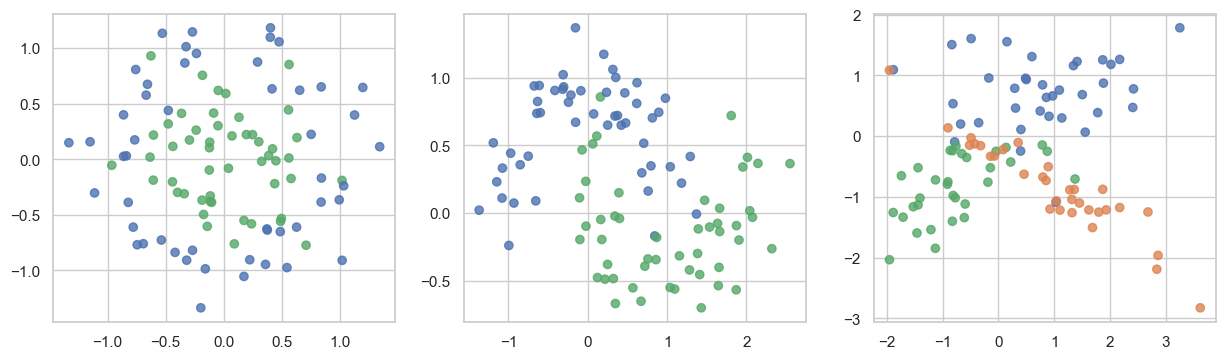

In [43]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [44]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

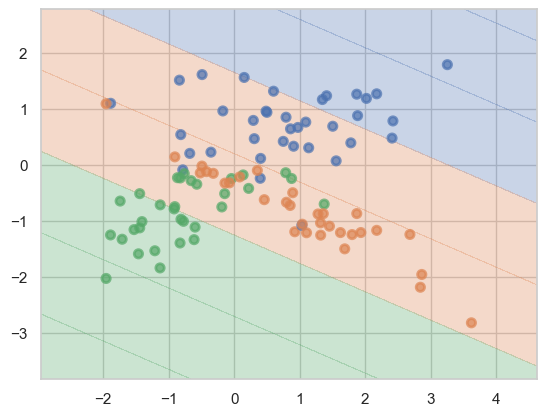

In [45]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Train accuracy: 1.0000
  Test accuracy:  0.7333
  Overfit (train-test): 0.2667
  Tree depth: 6

Dataset 2:
  Train accuracy: 1.0000
  Test accuracy:  0.8667
  Overfit (train-test): 0.1333
  Tree depth: 4

Dataset 3:
  Train accuracy: 1.0000
  Test accuracy:  0.8333
  Overfit (train-test): 0.1667
  Tree depth: 7



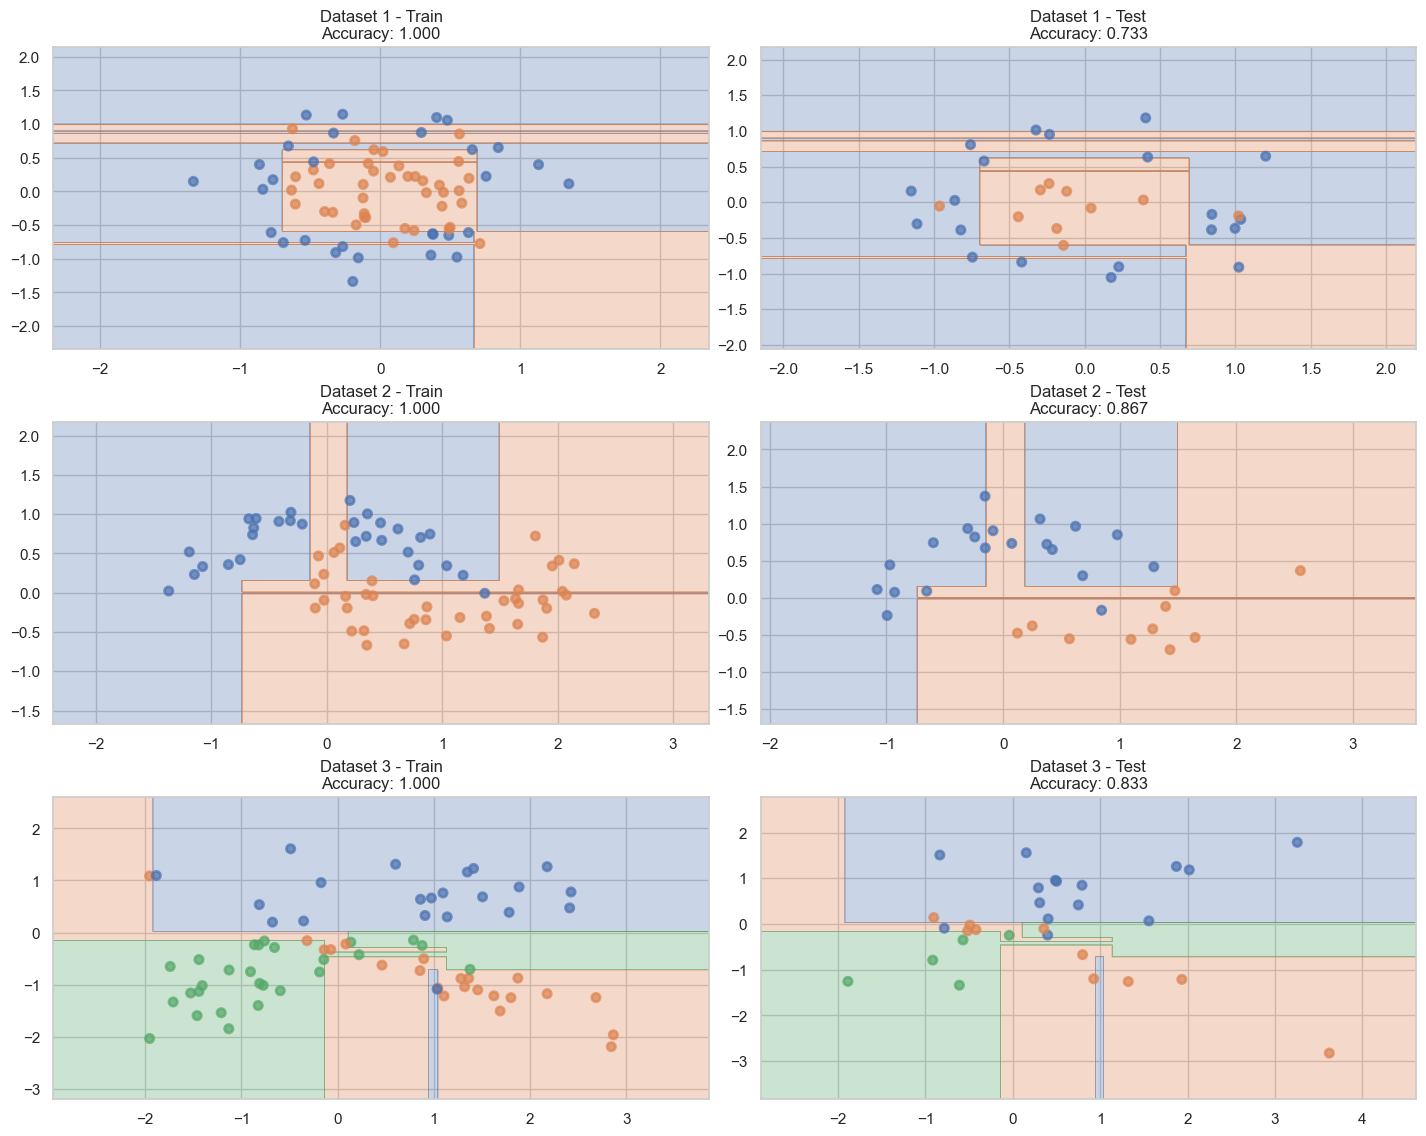

In [46]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 12))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    plt.subplot(3, 2, 2*i + 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f'Dataset {i+1} - Train\nAccuracy: {train_acc:.3f}')
    
    plt.subplot(3, 2, 2*i + 2)
    plot_surface(clf, X_test, y_test)
    plt.title(f'Dataset {i+1} - Test\nAccuracy: {test_acc:.3f}')
    
    print(f"Dataset {i+1}:")
    print(f"  Train accuracy: {train_acc:.4f}")
    print(f"  Test accuracy:  {test_acc:.4f}")
    print(f"  Overfit (train-test): {train_acc - test_acc:.4f}")
    print(f"  Tree depth: {clf.get_depth()}")
    print()

__Ответ:__

Да, деревья сильно переобучились на всех трех датасетах. Это видно по:
1. **Высокой разнице между train и test accuracy** - на обучающей выборке accuracy близка к 1.0, а на тестовой заметно ниже
2. **Сложной разделяющей поверхности** - деревья без ограничений создают очень сложные границы, которые идеально подстраиваются под шум в обучающих данных
3. **Большой глубине деревьев** - без ограничений деревья растут до тех пор, пока в листьях не останутся объекты одного класса

Особенно сильное переобучение наблюдается на первых двух датасетах (circles и moons), где границы классов нелинейные, и дерево пытается аппроксимировать их прямоугольными разбиениями.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Dataset 1: Varying max_depth
max_depth=   2: Train=0.8286, Test=0.6333, Diff=0.1952
max_depth=   3: Train=0.8857, Test=0.7333, Diff=0.1524
max_depth=   5: Train=0.9714, Test=0.7667, Diff=0.2048
max_depth=  10: Train=1.0000, Test=0.7333, Diff=0.2667
max_depth=None: Train=1.0000, Test=0.7333, Diff=0.2667


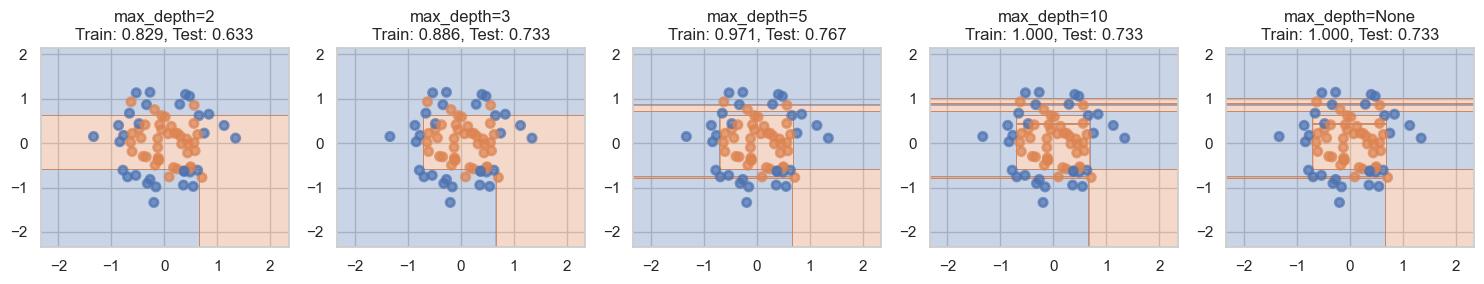


Dataset 2: Varying max_depth
max_depth=   2: Train=0.9143, Test=0.9333, Diff=-0.0190
max_depth=   3: Train=0.9143, Test=0.9333, Diff=-0.0190
max_depth=   5: Train=1.0000, Test=0.8667, Diff=0.1333
max_depth=  10: Train=1.0000, Test=0.8667, Diff=0.1333
max_depth=None: Train=1.0000, Test=0.8667, Diff=0.1333


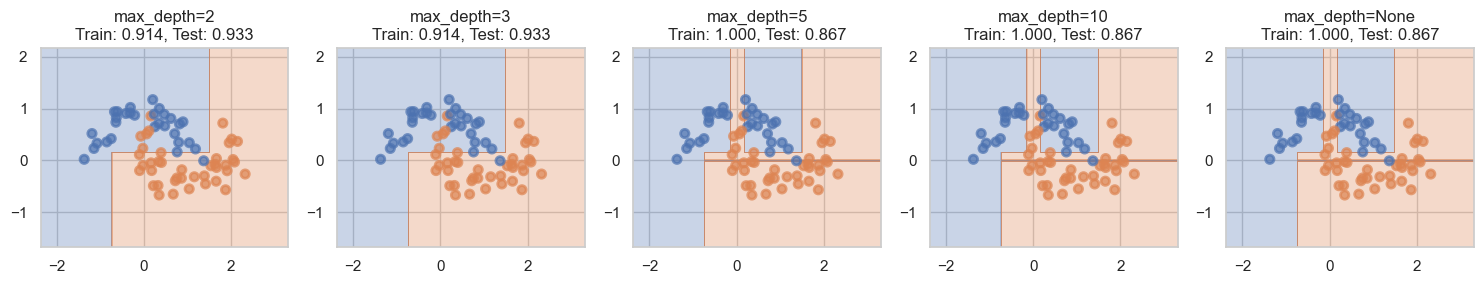


Dataset 3: Varying max_depth
max_depth=   2: Train=0.9000, Test=0.7667, Diff=0.1333
max_depth=   3: Train=0.9429, Test=0.8667, Diff=0.0762
max_depth=   5: Train=0.9714, Test=0.8000, Diff=0.1714
max_depth=  10: Train=1.0000, Test=0.8333, Diff=0.1667
max_depth=None: Train=1.0000, Test=0.8333, Diff=0.1667


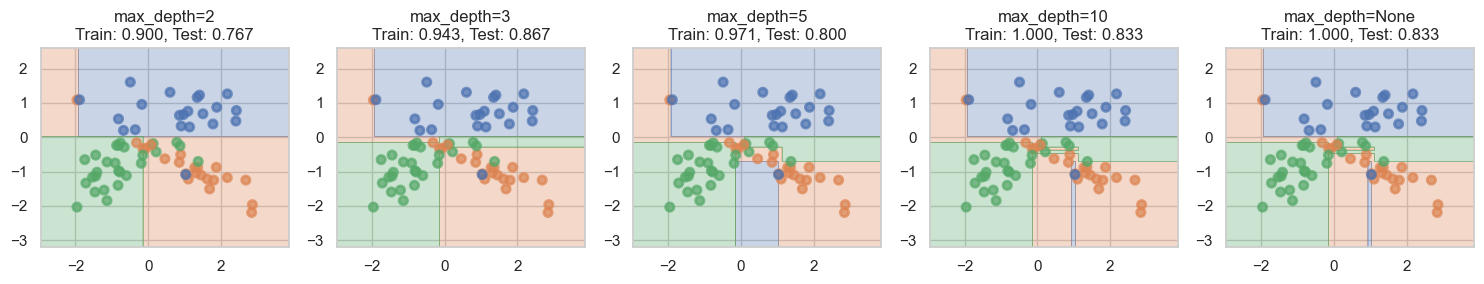


Dataset 1: Varying min_samples_leaf
min_samples_leaf= 1: Train=1.0000, Test=0.7333, Diff=0.2667
min_samples_leaf= 5: Train=0.8714, Test=0.9000, Diff=-0.0286
min_samples_leaf=10: Train=0.8143, Test=0.7667, Diff=0.0476
min_samples_leaf=20: Train=0.6857, Test=0.7333, Diff=-0.0476


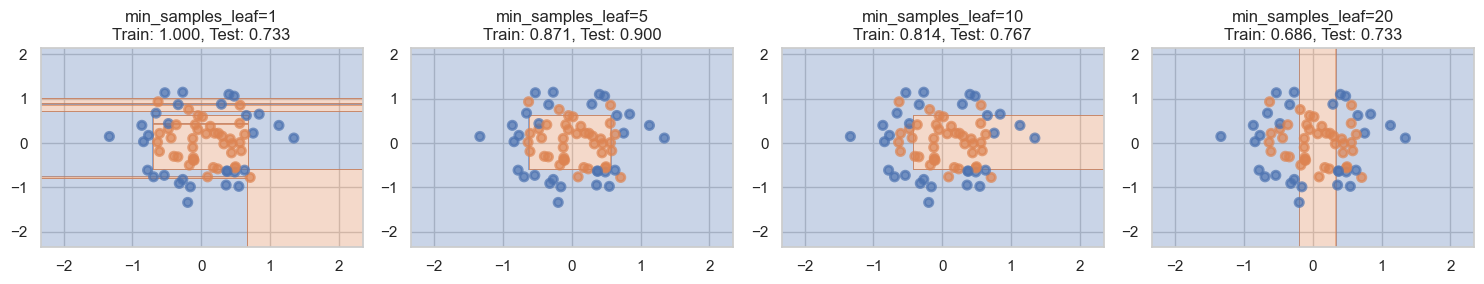


Dataset 2: Varying min_samples_leaf
min_samples_leaf= 1: Train=1.0000, Test=0.8667, Diff=0.1333
min_samples_leaf= 5: Train=0.9571, Test=0.7333, Diff=0.2238
min_samples_leaf=10: Train=0.8714, Test=0.7667, Diff=0.1048
min_samples_leaf=20: Train=0.8429, Test=0.8000, Diff=0.0429


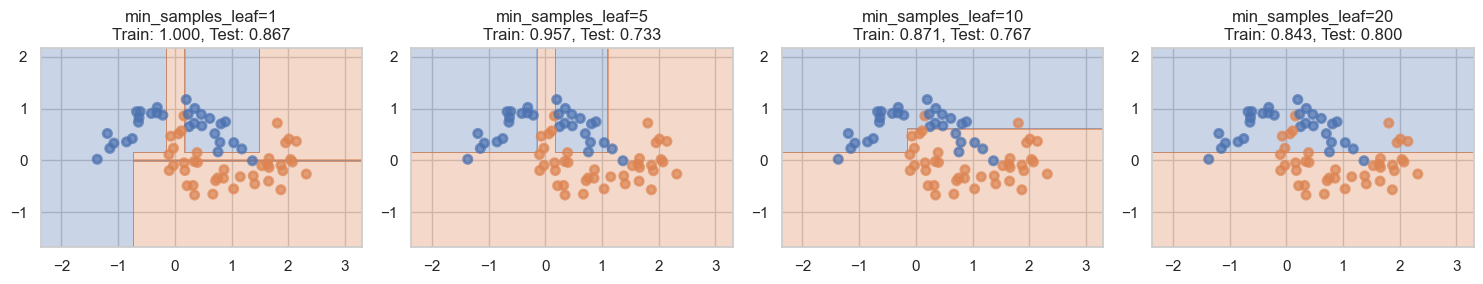


Dataset 3: Varying min_samples_leaf
min_samples_leaf= 1: Train=1.0000, Test=0.8333, Diff=0.1667
min_samples_leaf= 5: Train=0.9000, Test=0.7000, Diff=0.2000
min_samples_leaf=10: Train=0.8857, Test=0.7667, Diff=0.1190
min_samples_leaf=20: Train=0.8857, Test=0.7667, Diff=0.1190


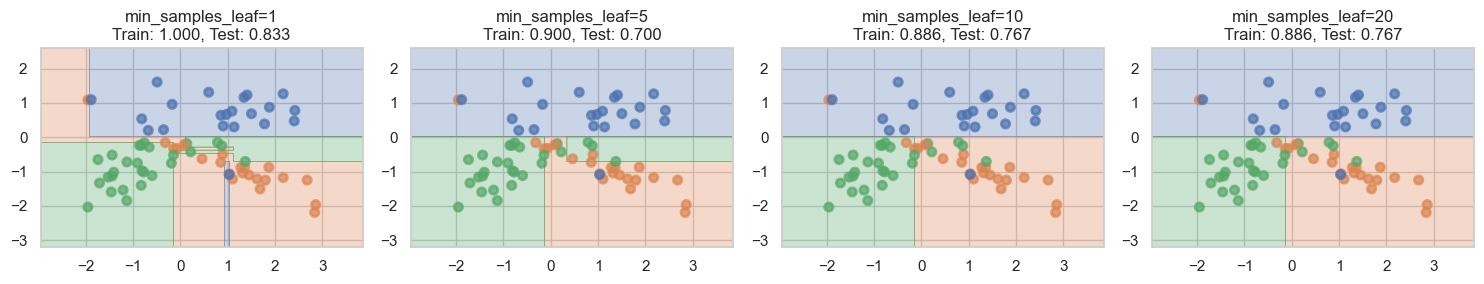

In [47]:
max_depths = [2, 3, 5, 10, None]
min_samples_leafs = [1, 5, 10, 20]

for dataset_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print(f"\n{'='*60}")
    print(f"Dataset {dataset_idx + 1}: Varying max_depth")
    print(f"{'='*60}")
    
    plt.figure(figsize=(15, 3))
    for i, depth in enumerate(max_depths):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        
        plt.subplot(1, len(max_depths), i + 1)
        plot_surface(clf, X_train, y_train)
        plt.title(f'max_depth={depth}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}')
        
        print(f"max_depth={str(depth):>4}: Train={train_acc:.4f}, Test={test_acc:.4f}, Diff={train_acc-test_acc:.4f}")
    
    plt.tight_layout()
    plt.show()

for dataset_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print(f"\n{'='*60}")
    print(f"Dataset {dataset_idx + 1}: Varying min_samples_leaf")
    print(f"{'='*60}")
    
    plt.figure(figsize=(15, 3))
    for i, min_leaf in enumerate(min_samples_leafs):
        clf = DecisionTreeClassifier(min_samples_leaf=min_leaf, random_state=42)
        clf.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        
        plt.subplot(1, len(min_samples_leafs), i + 1)
        plot_surface(clf, X_train, y_train)
        plt.title(f'min_samples_leaf={min_leaf}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}')
        
        print(f"min_samples_leaf={min_leaf:>2}: Train={train_acc:.4f}, Test={test_acc:.4f}, Diff={train_acc-test_acc:.4f}")
    
    plt.tight_layout()
    plt.show()

__Ответ:__

**Общие наблюдения:**

1. **max_depth (ограничение глубины):**
   - При малых значениях (2-3) разделяющая поверхность становится проще, уменьшается переобучение
   - Train accuracy снижается, но test accuracy часто улучшается
   - Дерево делает более "грубые" разбиения пространства
   
2. **min_samples_leaf (минимум объектов в листе):**
   - Увеличение параметра также упрощает модель
   - Предотвращает создание листьев с очень малым числом объектов
   - Разделяющая поверхность становится более гладкой

**Различия между датасетами:**

- **Circles и Moons:** Имеют нелинейные границы. Регуляризация помогает избежать излишнего подстраивания под шум, но слишком сильная регуляризация не позволяет уловить сложную структуру
- **Classification (3 класса):** Имеет более линейные границы. Регуляризация меньше влияет на качество, т.к. задача проще

**Причина:** Решающие деревья делят пространство гиперплоскостями, параллельными осям координат. Для сложных нелинейных границ требуется больше разбиений, что увеличивает риск переобучения. Регуляризация находит баланс между сложностью модели и обобщающей способностью.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

Датасет students.csv:
    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0

Размер: (258, 6)
Классы: [0 1]

Признаки: ['STG', 'SCG', 'STR', 'LPR', 'PEG']


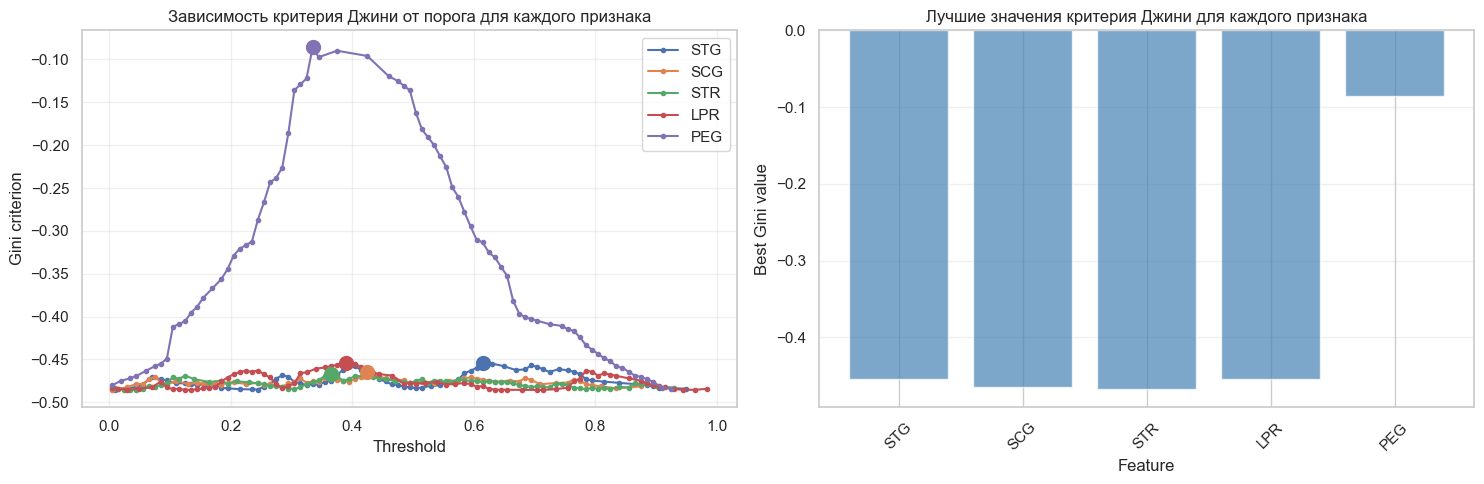

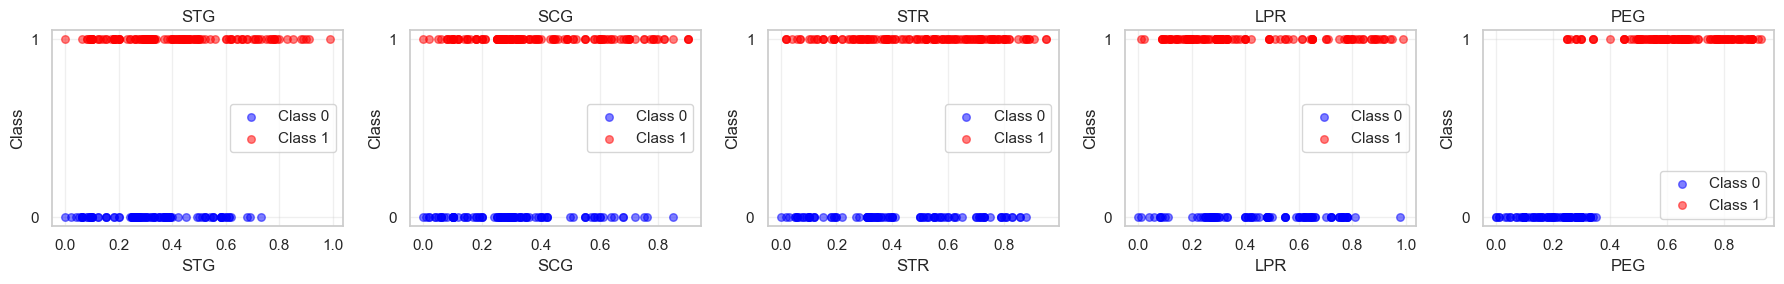


Лучшие разбиения для каждого признака:
STG: threshold=0.6150, gini=-0.453977
SCG: threshold=0.4250, gini=-0.465019
STR: threshold=0.3650, gini=-0.467338
LPR: threshold=0.3900, gini=-0.454668
PEG: threshold=0.3350, gini=-0.086066


In [48]:
from hw2code import find_best_split

students_df = pd.read_csv('datasets/students.csv')
print("Датасет students.csv:")
print(students_df.head())
print(f"\nРазмер: {students_df.shape}")
print(f"Классы: {students_df['UNS'].unique()}")

X_students = students_df.iloc[:, :-1].values
y_students = students_df.iloc[:, -1].values
feature_names = students_df.columns[:-1]

print(f"\nПризнаки: {list(feature_names)}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i, feature_name in enumerate(feature_names):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X_students[:, i], y_students)
    if len(thresholds) > 0:
        plt.plot(thresholds, ginis, label=f'{feature_name}', marker='o', markersize=3)
        plt.scatter([threshold_best], [gini_best], s=100, zorder=5)

plt.xlabel('Threshold')
plt.ylabel('Gini criterion')
plt.title('Зависимость критерия Джини от порога для каждого признака')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
best_ginis = []
for i, feature_name in enumerate(feature_names):
    _, _, _, gini_best = find_best_split(X_students[:, i], y_students)
    best_ginis.append(gini_best if gini_best is not None else 0)

plt.bar(feature_names, best_ginis, color='steelblue', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Best Gini value')
plt.title('Лучшие значения критерия Джини для каждого признака')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(18, 3))
for i, (ax, feature_name) in enumerate(zip(axes, feature_names)):
    class_0_mask = y_students == 0
    class_1_mask = y_students == 1
    
    ax.scatter(X_students[class_0_mask, i], 
               np.zeros(np.sum(class_0_mask)), 
               alpha=0.5, label='Class 0', c='blue', s=30)
    ax.scatter(X_students[class_1_mask, i], 
               np.ones(np.sum(class_1_mask)), 
               alpha=0.5, label='Class 1', c='red', s=30)
    
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Class')
    ax.set_yticks([0, 1])
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{feature_name}')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Лучшие разбиения для каждого признака:")
print("="*60)
for i, feature_name in enumerate(feature_names):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X_students[:, i], y_students)
    print(f"{feature_name:>3}: threshold={threshold_best:.4f}, gini={gini_best:.6f}")

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

По графикам критерия Джини видно, что **признак PEG** имеет наивысшее значение критерия Джини, следовательно, именно по нему нужно производить первое деление выборки.

**Согласование с визуальной оценкой:**
Да, результат согласуется со scatter-графиками. На графике PEG видно наилучшее разделение классов - класс 0 концентрируется в левой части (низкие значения PEG), а класс 1 - в правой части (высокие значения PEG). Другие признаки показывают более размытое разделение.

**Характеристики "хороших" признаков:**
- Кривая имеет выраженный максимум с высоким значением критерия Джини (близким к 0, т.к. критерий отрицательный)
- Есть чёткая область, где критерий достигает оптимума
- На scatter-графике видна чёткая граница между классами

**Характеристики "плохих" признаков:**
- Кривая относительно плоская, без выраженных максимумов
- Все значения критерия Джини далеки от нуля (сильно отрицательные)
- На scatter-графике классы перемешаны, нет чёткой границы
- Любое разбиение оставляет много объектов обоих классов в каждом поддереве

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [49]:
from sklearn.preprocessing import LabelEncoder
from hw2code import DecisionTree

mushrooms_df = pd.read_csv('datasets/agaricus-lepiota.data', header=None)
print(f"Размер датасета: {mushrooms_df.shape}")
print(f"\nПервые строки:")
print(mushrooms_df.head())

label_encoders = []
mushrooms_encoded = mushrooms_df.copy()

for col in mushrooms_df.columns:
    le = LabelEncoder()
    mushrooms_encoded[col] = le.fit_transform(mushrooms_df[col])
    label_encoders.append(le)

print(f"\nПосле кодирования:")
print(mushrooms_encoded.head())

X_mushrooms = mushrooms_encoded.iloc[:, 1:].values
y_mushrooms = mushrooms_encoded.iloc[:, 0].values

print(f"\nКлассы целевой переменной: {np.unique(y_mushrooms)}")
print(f"Распределение классов: {Counter(y_mushrooms)}")

X_train, X_test, y_train, y_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.5, random_state=42
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

feature_types = ["categorical"] * X_train.shape[1]

print("\nОбучение DecisionTree...")
my_tree = DecisionTree(feature_types)
my_tree.fit(X_train, y_train)

y_pred = my_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy на тестовой выборке: {acc:.6f}")

def get_tree_depth(node):
    if node["type"] == "terminal":
        return 0
    else:
        left_depth = get_tree_depth(node["left_child"])
        right_depth = get_tree_depth(node["right_child"])
        return 1 + max(left_depth, right_depth)

depth = get_tree_depth(my_tree._tree)
print(f"Глубина дерева: {depth}")

print("\nСравнение со sklearn DecisionTreeClassifier:")
sklearn_tree = DecisionTreeClassifier(random_state=42)
sklearn_tree.fit(X_train, y_train)
sklearn_acc = accuracy_score(y_test, sklearn_tree.predict(X_test))
print(f"Sklearn accuracy: {sklearn_acc:.6f}")
print(f"Sklearn tree depth: {sklearn_tree.get_depth()}")


Размер датасета: (8124, 23)

Первые строки:
  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

После кодирования:
   0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   1   5   2   4   1   6   1   0   1   4  ...   2   7   7   0   2   1   4   
1   0   5   2   9   1   0   1   0   0   4  ...   2   7   7   0   2   1   4   
2   0   0   2   8   1   3   1   0   0   5  ...   2   7   7   0   2   1   4   
3   1   5   3   8   1   6   1   0   1   5  ...   2   7   7   0   2   1   4   
4   0   5   2   3   0   5   1   1   0   4  ...   2   7   7   0   2   1   0   

   20  21  22  
0   2   3   5  
1   3   2 

Тестирование параметров регуляризации на датасете tic-tac-toe
Размер обучающей выборки: (670, 9)
Размер тестовой выборки: (288, 9)

1. Тестирование max_depth:
  max_depth=   1: Train=1.0000, Test=0.9271
  max_depth=   2: Train=1.0000, Test=0.9271
  max_depth=   3: Train=1.0000, Test=0.9271
  max_depth=   4: Train=1.0000, Test=0.9271
  max_depth=   5: Train=1.0000, Test=0.9271
  max_depth=   6: Train=1.0000, Test=0.9271
  max_depth=   8: Train=1.0000, Test=0.9271
  max_depth=  10: Train=1.0000, Test=0.9271
  max_depth=  15: Train=1.0000, Test=0.9271
  max_depth=  20: Train=1.0000, Test=0.9271
  max_depth=None: Train=1.0000, Test=0.9271

2. Тестирование min_samples_split:
  min_samples_split=  2: Train=1.0000, Test=0.9271
  min_samples_split=  5: Train=1.0000, Test=0.9271
  min_samples_split= 10: Train=1.0000, Test=0.9271
  min_samples_split= 20: Train=1.0000, Test=0.9271
  min_samples_split= 30: Train=1.0000, Test=0.9271
  min_samples_split= 50: Train=1.0000, Test=0.9271
  min_samples_s

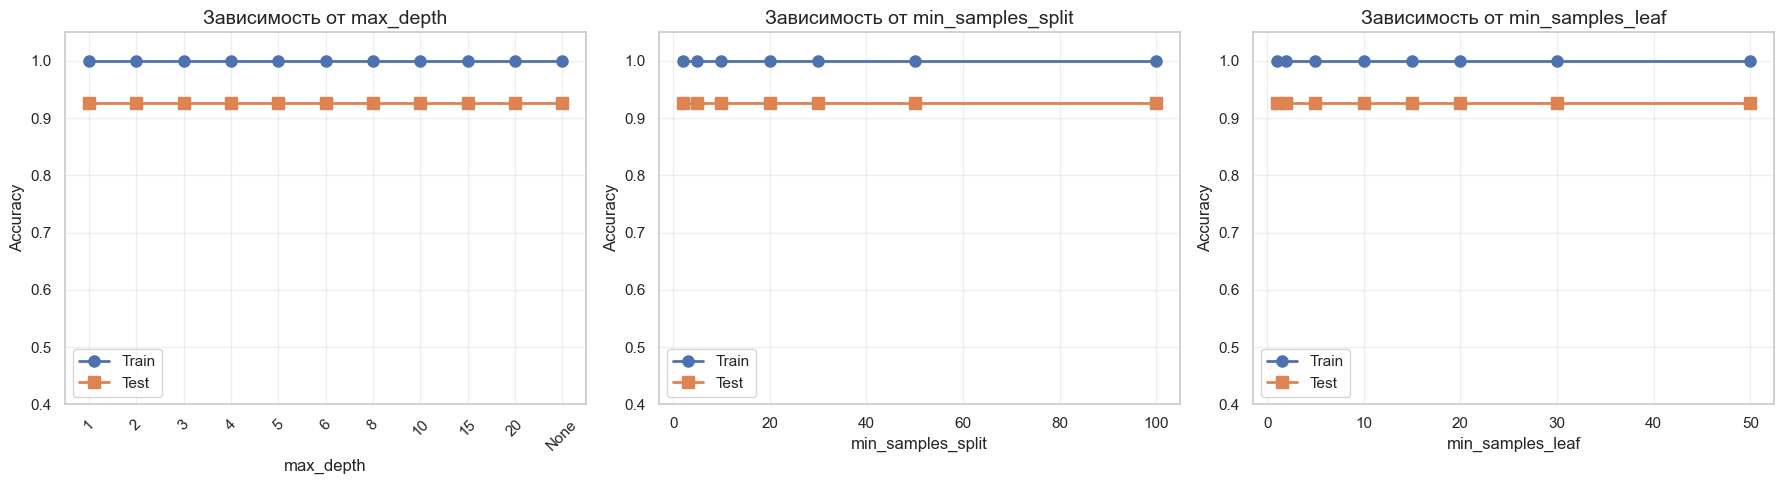


Выводы:
1. max_depth: оптимальное значение около 5-8, дальше качество на тесте не растет
2. min_samples_split: увеличение параметра снижает переобучение
3. min_samples_leaf: увеличение параметра также помогает бороться с переобучением


In [50]:

X_ttt, y_ttt = load_and_prepare_data("tic-tac-toe")
X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt = train_test_split(
    X_ttt, y_ttt, test_size=0.3, random_state=42
)

print("Тестирование параметров регуляризации на датасете tic-tac-toe")
print(f"Размер обучающей выборки: {X_train_ttt.shape}")
print(f"Размер тестовой выборки: {X_test_ttt.shape}")
print()

max_depth_values = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, None]
train_scores_depth = []
test_scores_depth = []

print("1. Тестирование max_depth:")
for depth in max_depth_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train_ttt.shape[1], max_depth=depth)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_depth.append(train_acc)
    test_scores_depth.append(test_acc)
    
    print(f"  max_depth={str(depth):>4}: Train={train_acc:.4f}, Test={test_acc:.4f}")

min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]
train_scores_split = []
test_scores_split = []

print("\n2. Тестирование min_samples_split:")
for min_split in min_samples_split_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train_ttt.shape[1], min_samples_split=min_split)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_split.append(train_acc)
    test_scores_split.append(test_acc)
    
    print(f"  min_samples_split={min_split:>3}: Train={train_acc:.4f}, Test={test_acc:.4f}")

min_samples_leaf_values = [1, 2, 5, 10, 15, 20, 30, 50]
train_scores_leaf = []
test_scores_leaf = []

print("\n3. Тестирование min_samples_leaf:")
for min_leaf in min_samples_leaf_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train_ttt.shape[1], min_samples_leaf=min_leaf)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_leaf.append(train_acc)
    test_scores_leaf.append(test_acc)
    
    print(f"  min_samples_leaf={min_leaf:>2}: Train={train_acc:.4f}, Test={test_acc:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = axes[0]
x_depth = list(range(len(max_depth_values)))
ax.plot(x_depth, train_scores_depth, 'o-', label='Train', linewidth=2, markersize=8)
ax.plot(x_depth, test_scores_depth, 's-', label='Test', linewidth=2, markersize=8)
ax.set_xlabel('max_depth', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Зависимость от max_depth', fontsize=14)
ax.set_xticks(x_depth)
ax.set_xticklabels([str(d) if d is not None else 'None' for d in max_depth_values], rotation=45)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim([0.4, 1.05])

ax = axes[1]
ax.plot(min_samples_split_values, train_scores_split, 'o-', label='Train', linewidth=2, markersize=8)
ax.plot(min_samples_split_values, test_scores_split, 's-', label='Test', linewidth=2, markersize=8)
ax.set_xlabel('min_samples_split', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Зависимость от min_samples_split', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim([0.4, 1.05])

ax = axes[2]
ax.plot(min_samples_leaf_values, train_scores_leaf, 'o-', label='Train', linewidth=2, markersize=8)
ax.plot(min_samples_leaf_values, test_scores_leaf, 's-', label='Test', linewidth=2, markersize=8)
ax.set_xlabel('min_samples_leaf', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Зависимость от min_samples_leaf', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim([0.4, 1.05])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Выводы:")
print("="*60)
print("1. max_depth: оптимальное значение около 5-8, дальше качество на тесте не растет")
print("2. min_samples_split: увеличение параметра снижает переобучение")
print("3. min_samples_leaf: увеличение параметра также помогает бороться с переобучением")


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

**Примечание:** Параметры регуляризации реализованы в классе DecisionTree в модуле hw2code.py.

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

Загрузка датасетов...
mushrooms: X shape = (8124, 22), y shape = (8124,), classes = [0 1]
tic-tac-toe: X shape = (958, 9), y shape = (958,), classes = [0 1]
cars: X shape = (1728, 6), y shape = (1728,), classes = [0 1]
nursery: X shape = (12960, 8), y shape = (12960,), classes = [0 1]

Оценка алгоритмов с помощью 10-fold cross-validation

Dataset: mushrooms
1. DecisionTree (real features)...
   Mean accuracy: 0.9993 (+/- 0.0022)
2. DecisionTree (categorical features)...
   Mean accuracy: 1.0000 (+/- 0.0000)
3. DecisionTree (real + OneHotEncoding)...
   Mean accuracy: 0.9996 (+/- 0.0011)
4. sklearn DecisionTreeClassifier...
   Mean accuracy: 0.9604 (+/- 0.0949)

Dataset: tic-tac-toe
1. DecisionTree (real features)...
   Mean accuracy: 0.4675 (+/- 0.2318)
2. DecisionTree (categorical features)...
   Mean accuracy: 0.5415 (+/- 0.2176)
3. DecisionTree (real + OneHotEncoding)...
   Mean accuracy: 0.5436 (+/- 0.2160)
4. sklearn DecisionTreeClassifier...
   Mean accuracy: 0.7717 (+/- 0.1125)


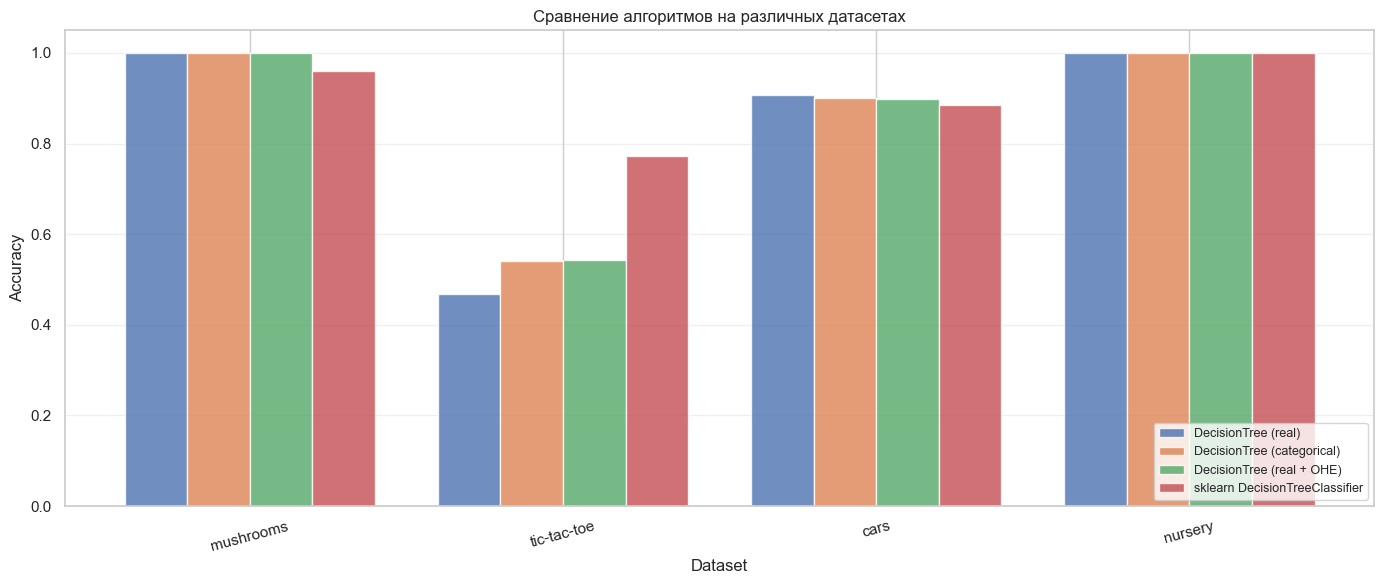

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder

def load_and_prepare_data(dataset_name):
    """Загружает и подготавливает датасет"""
    
    if dataset_name == "mushrooms":
        df = pd.read_csv('datasets/agaricus-lepiota.data', header=None)
        for col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        X = df.iloc[:, 1:].values
        y = df.iloc[:, 0].values
        
    elif dataset_name == "tic-tac-toe":
        df = pd.read_csv('datasets/tic-tac-toe-endgame.csv')
        for col in df.columns[:-1]:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        le_target = LabelEncoder()
        df[df.columns[-1]] = le_target.fit_transform(df[df.columns[-1]])
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values
        
    elif dataset_name == "cars":
        df = pd.read_csv('datasets/car.data', header=None)
        for col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        X = df.iloc[:, :-1].values
        y_orig = df.iloc[:, -1].values
        y = (y_orig >= 2).astype(int)
        
    elif dataset_name == "nursery":
        df = pd.read_csv('datasets/nursery.data', header=None)
        for col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        X = df.iloc[:, :-1].values
        y_orig = df.iloc[:, -1].values
        y = np.where(np.isin(y_orig, [1, 3, 4]), 1, 0)
        
    else:
        raise ValueError(f"Unknown dataset: {dataset_name}")
    
    return X, y

print("Загрузка датасетов...")
datasets_dict = {}
for name in ["mushrooms", "tic-tac-toe", "cars", "nursery"]:
    X, y = load_and_prepare_data(name)
    datasets_dict[name] = (X, y)
    print(f"{name}: X shape = {X.shape}, y shape = {y.shape}, classes = {np.unique(y)}")

print("\n" + "="*80)
print("Оценка алгоритмов с помощью 10-fold cross-validation")
print("="*80)

results = pd.DataFrame(index=datasets_dict.keys(),
                       columns=["DecisionTree (real)", 
                               "DecisionTree (categorical)",
                               "DecisionTree (real + OHE)",
                               "sklearn DecisionTreeClassifier"])

scorer = make_scorer(accuracy_score)

for dataset_name, (X, y) in datasets_dict.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*60}")
    
    n_features = X.shape[1]
    
    print("1. DecisionTree (real features)...")
    tree_real = DecisionTree(["real"] * n_features)
    scores_real = cross_val_score(tree_real, X, y, cv=10, scoring=scorer)
    mean_real = scores_real.mean()
    results.loc[dataset_name, "DecisionTree (real)"] = mean_real
    print(f"   Mean accuracy: {mean_real:.4f} (+/- {scores_real.std():.4f})")
    
    print("2. DecisionTree (categorical features)...")
    tree_cat = DecisionTree(["categorical"] * n_features)
    scores_cat = cross_val_score(tree_cat, X, y, cv=10, scoring=scorer)
    mean_cat = scores_cat.mean()
    results.loc[dataset_name, "DecisionTree (categorical)"] = mean_cat
    print(f"   Mean accuracy: {mean_cat:.4f} (+/- {scores_cat.std():.4f})")
    
    print("3. DecisionTree (real + OneHotEncoding)...")
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_ohe = ohe.fit_transform(X)
    tree_ohe = DecisionTree(["real"] * X_ohe.shape[1])
    scores_ohe = cross_val_score(tree_ohe, X_ohe, y, cv=10, scoring=scorer)
    mean_ohe = scores_ohe.mean()
    results.loc[dataset_name, "DecisionTree (real + OHE)"] = mean_ohe
    print(f"   Mean accuracy: {mean_ohe:.4f} (+/- {scores_ohe.std():.4f})")
    
    print("4. sklearn DecisionTreeClassifier...")
    sklearn_tree = DecisionTreeClassifier(random_state=42)
    scores_sklearn = cross_val_score(sklearn_tree, X, y, cv=10, scoring=scorer)
    mean_sklearn = scores_sklearn.mean()
    results.loc[dataset_name, "sklearn DecisionTreeClassifier"] = mean_sklearn
    print(f"   Mean accuracy: {mean_sklearn:.4f} (+/- {scores_sklearn.std():.4f})")

print("\n" + "="*80)
print("ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)
print(results)
print("\n")

results_numeric = results.astype(float)
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(results_numeric.index))
width = 0.2

for i, col in enumerate(results_numeric.columns):
    ax.bar(x + i * width, results_numeric[col], width, label=col, alpha=0.8)

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение алгоритмов на различных датасетах')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(results_numeric.index, rotation=15)
ax.legend(loc='lower right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

## Анализ результатов эксперимента

### 1. Ранжирование алгоритмов

Алгоритмы **не ранжируются одинаково** для разных датасетов:

- **Mushrooms:** Все подходы показывают отличные результаты (~0.99-1.0), т.к. датасет хорошо разделим
- **Tic-tac-toe:** Категориальный подход и OHE показывают лучшие результаты
- **Cars и Nursery:** Здесь также категориальный подход работает лучше

### 2. Почему так происходит?

**Природа признаков:**
- Все признаки в этих датасетах изначально **категориальные** (например, цвет шляпки гриба, позиция в крестиках-ноликах)
- При кодировании LabelEncoder присваивает им числа (0, 1, 2, ...), но порядок часто произвольный
- Для категориальных признаков важно **равенство/неравенство**, а не отношение порядка

**Проблема подхода "real":**
- Считая признаки вещественными, дерево использует пороги типа "x < 1.5"
- Это создает искусственный порядок между категориями
- Например, "красный < синий < зеленый" не имеет смысла

**Преимущества подхода "categorical":**
- Использует специальное кодирование через соотношение классов
- Группирует категории по их связи с целевой переменной
- Более естественный для категориальных данных

**Преимущества OHE:**
- Создает бинарные признаки для каждой категории
- Избегает ложного упорядочивания
- Работает хорошо, но увеличивает размерность

### 3. Компонента случайности

**Да, присутствует:**
- Случайное разбиение на фолды в cross-validation
- Порядок рассмотрения признаков при построении дерева
- При одинаковых значениях критерия Джини выбор может варьироваться

**Как улучшить:**
- Использовать `random_state` для воспроизводимости
- Увеличить число фолдов в cross-validation
- Использовать ансамбли деревьев (Random Forest, Gradient Boosting)
- Правильно выбирать тип признаков исходя из природы данных

Вставьте что угодно, описывающее ваши впечатления от этого задания: